In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import CategoricalAccuracy
import random

# **Data preparation**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


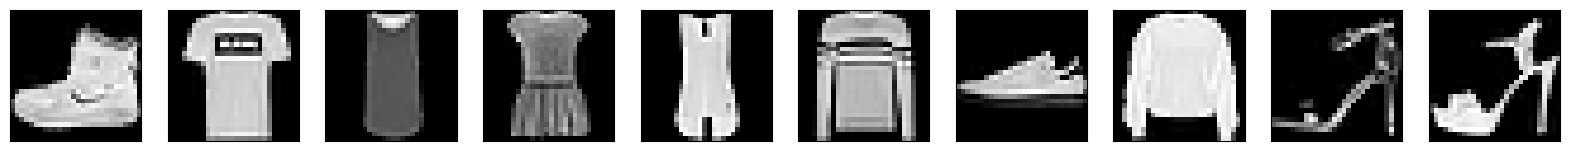

In [4]:
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(20, 8))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
def learning_rate_schedule(epoch, lr):
  new_lr = lr
  if epoch == 10:
    new_lr = lr*0.1
  elif epoch == 20:
    new_lr = lr*0.01
  return new_lr

# **Model creating**

In [7]:
model_3 = keras.Sequential([
Flatten(input_shape=(28, 28)),
Dense(1024, activation='relu'),

Dense(512, activation='relu'),

Dense(256, activation='relu'),

Dense(128, activation='relu'),

Dense(10, activation='softmax')
])

In [8]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate)

model_3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,494,154
Trainable params: 1,494,154
Non-

In [9]:
lr_scheduler = LearningRateScheduler(learning_rate_schedule)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [10]:
model_3.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test, y_test), callbacks=[lr_scheduler, early_stopping] )

Epoch 1/30
469/469 [==============================] - 40s 77ms/step - loss: 0.4885 - accuracy: 0.8205 - val_loss: 0.4104 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 2/30
469/469 [==============================] - 23s 49ms/step - loss: 0.3604 - accuracy: 0.8673 - val_loss: 0.3804 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 3/30
469/469 [==============================] - 21s 46ms/step - loss: 0.3230 - accuracy: 0.8805 - val_loss: 0.3569 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 4/30
469/469 [==============================] - 23s 48ms/step - loss: 0.2971 - accuracy: 0.8884 - val_loss: 0.3567 - val_accuracy: 0.8754 - lr: 0.0010
Epoch 5/30
469/469 [==============================] - 24s 51ms/step - loss: 0.2814 - accuracy: 0.8942 - val_loss: 0.3742 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 6/30
469/469 [==============================] - 24s 52ms/step - loss: 0.2670 - accuracy: 0.8995 - val_loss: 0.3618 - val_accuracy: 0.8692 - lr: 0.0010
Epoch 7/30
469/469 [==============================] - 23s 

# **Test Accuracy**

In [11]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3628 - accuracy: 0.9015


# **Predictions and visualization**

In [12]:
predictions = model_3.predict(x_test)
predictions.shape
predictions[0]

313/313 [==============================] - 3s 8ms/step


array([3.1494704e-10, 1.1033435e-10, 8.4745787e-12, 1.8198286e-13,
       4.5221528e-13, 1.7301520e-07, 1.8899929e-12, 3.8651215e-06,
       1.8876135e-10, 9.9999589e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[9]

'Ankle boot'

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

<ipython-input-16-0676bfb85272>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


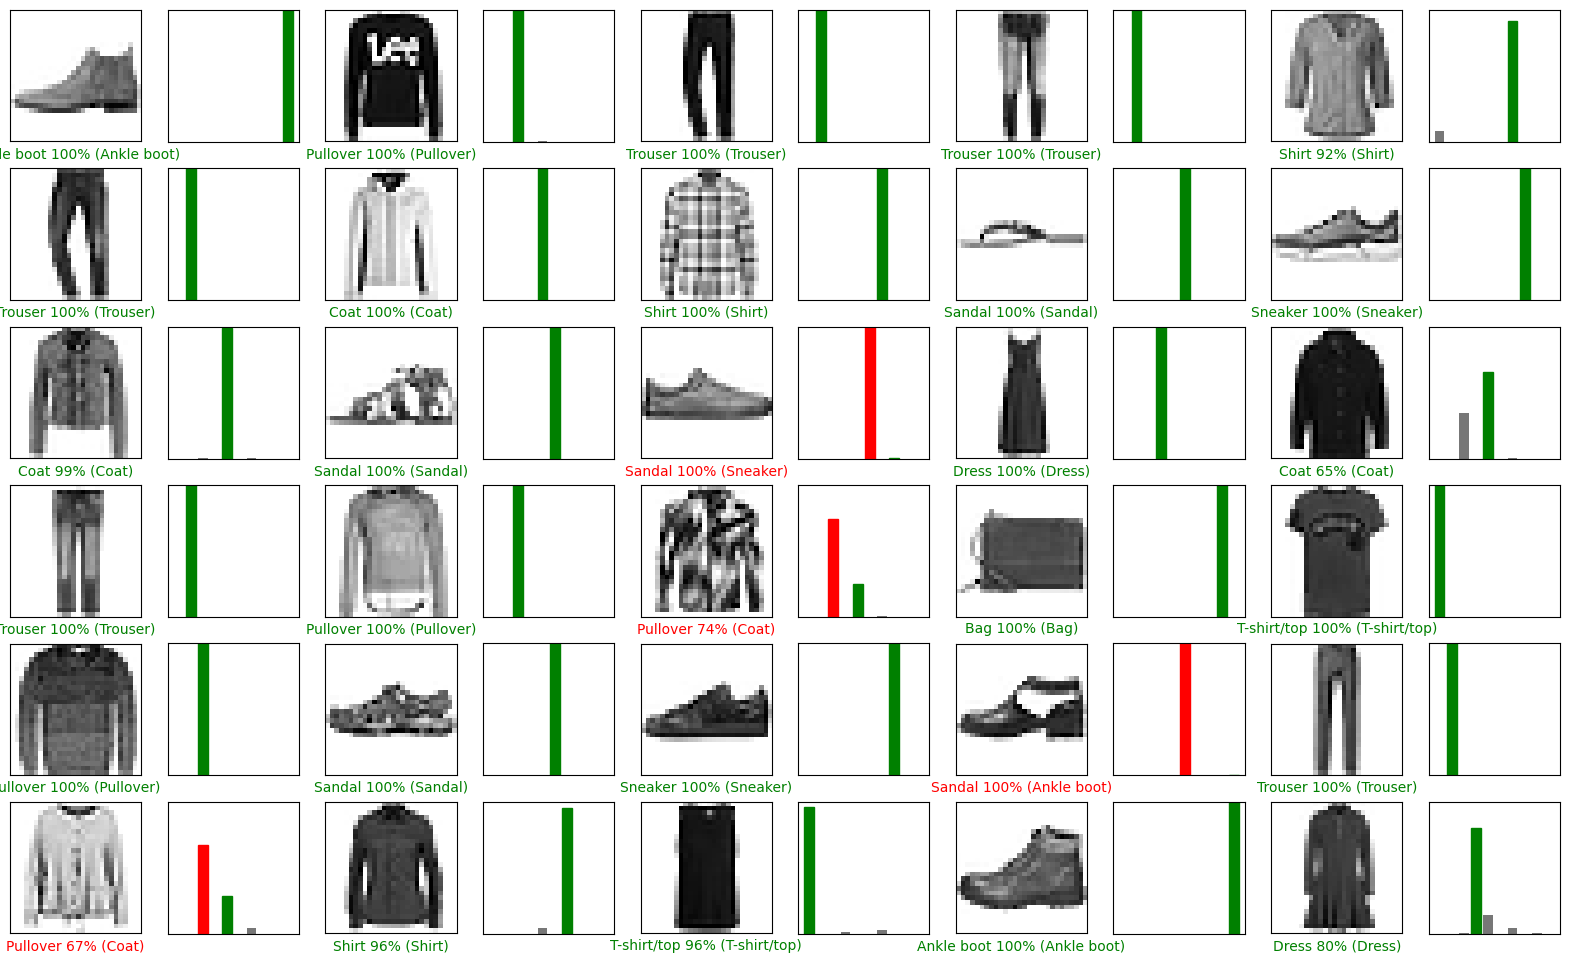

In [16]:
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 30 images")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)


# **Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

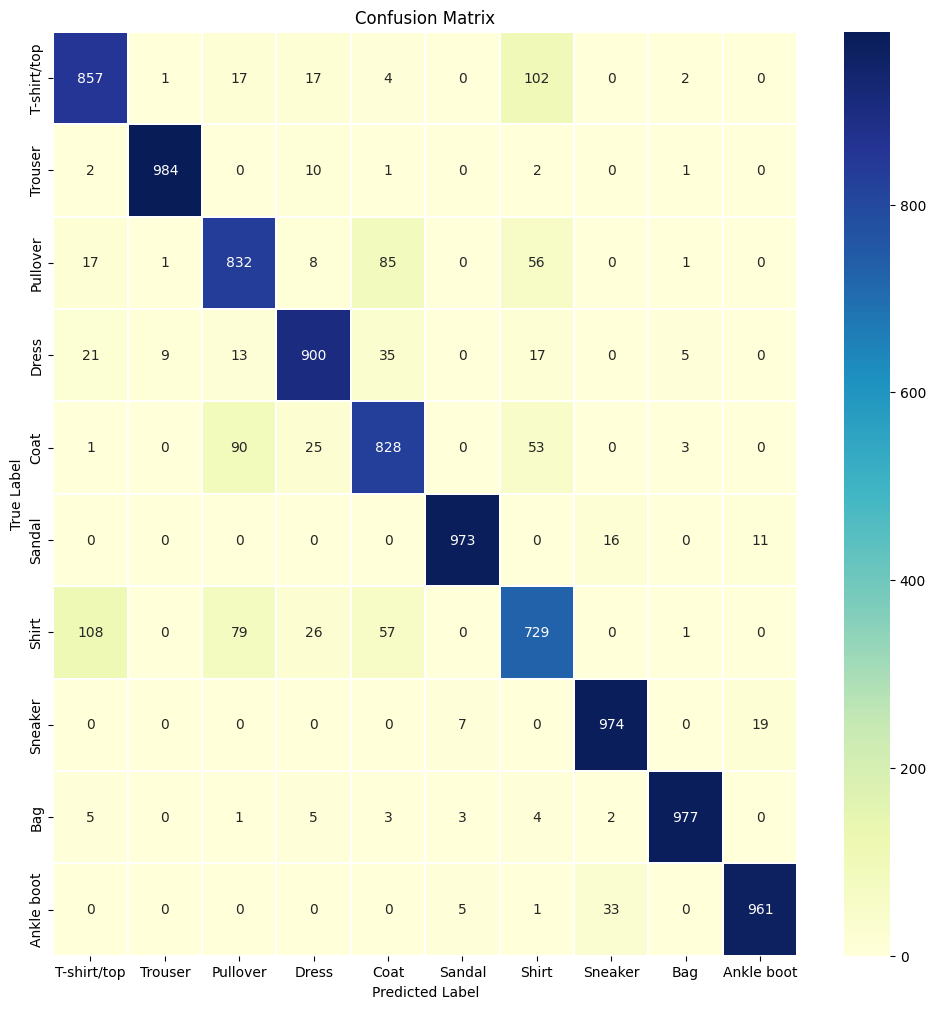

In [18]:
y_pred_classes = np.argmax(predictions, axis = 1)
y_test = y_test.reshape(-1,1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "YlGnBu", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
plt.show()